In [62]:
import src
from src import *

In [35]:
returns = pd.read_csv('src/stock_returns.csv', index_col=0, parse_dates=True)
risk_free_rate = pd.read_csv('src/risk_free_rate.csv', index_col=0, parse_dates=True)

2017-02-10 start test to 2018-02-07

In [36]:
train_returns = returns.iloc[:1000]
test_returns = returns.iloc[1000:]
test_risk_free_rate = risk_free_rate.iloc[1000:]
test_risk_free_rate

,risk_free_rate
date,
2017-02-10,0.000022
2017-02-13,0.000021
2017-02-14,0.000021
2017-02-15,0.000021
2017-02-16,0.000021
...,...
2018-02-01,0.000059
2018-02-02,0.000059
2018-02-05,0.000060


In [37]:
predictor = ReturnPredictor(train_returns)
optimizer = PortfolioOptimizer(train_returns)

def equal_weight_strategy(train_ret):
    opt = PortfolioOptimizer(train_ret)
    return opt.equal_weight()

def min_var_strategy(train_ret):
    opt = PortfolioOptimizer(train_ret)
    return opt.minimum_variance(max_position=0.05)

In [38]:
backtester = WalkForwardBacktest(
    train_returns=train_returns,
    test_returns=test_returns,
    # test_prices=test_prices,
    rf_rate_test=test_risk_free_rate,
    rebalance_freq='W'  # Weekly
)

In [39]:
results = {}

# Run Equal Weight
results['Equal Weight'] = backtester.run_backtest(
    strategy_name='Equal Weight',
    get_weights_func=equal_weight_strategy,
    transaction_cost_bps=10.0
)

# Run Minimum Variance
results['Minimum Variance'] = backtester.run_backtest(
    strategy_name='Minimum Variance',
    get_weights_func=min_var_strategy,
    transaction_cost_bps=10.0
)


Running backtest: Equal Weight
Rebalancing frequency: W
Rebalancing dates: 53
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248

Running backtest: Minimum Variance

KeyboardInterrupt: 


Performance Comparison:
                 Total Return Annualized Return Annualized Volatility Sharpe Ratio Sortino Ratio Maximum Drawdown Calmar Ratio Win Rate Avg Turnover per Rebalance Total Turnover
Equal Weight            9.16%             9.32%                 8.61%        0.960         0.846           -7.79%        1.196   56.68%                      2.55%           1.15
Minimum Variance       10.08%            10.25%                 6.94%        1.295         1.113           -6.70%        1.529   58.70%                      6.19%           2.79

5. Generating Visualizations
------------------------------------------------------------


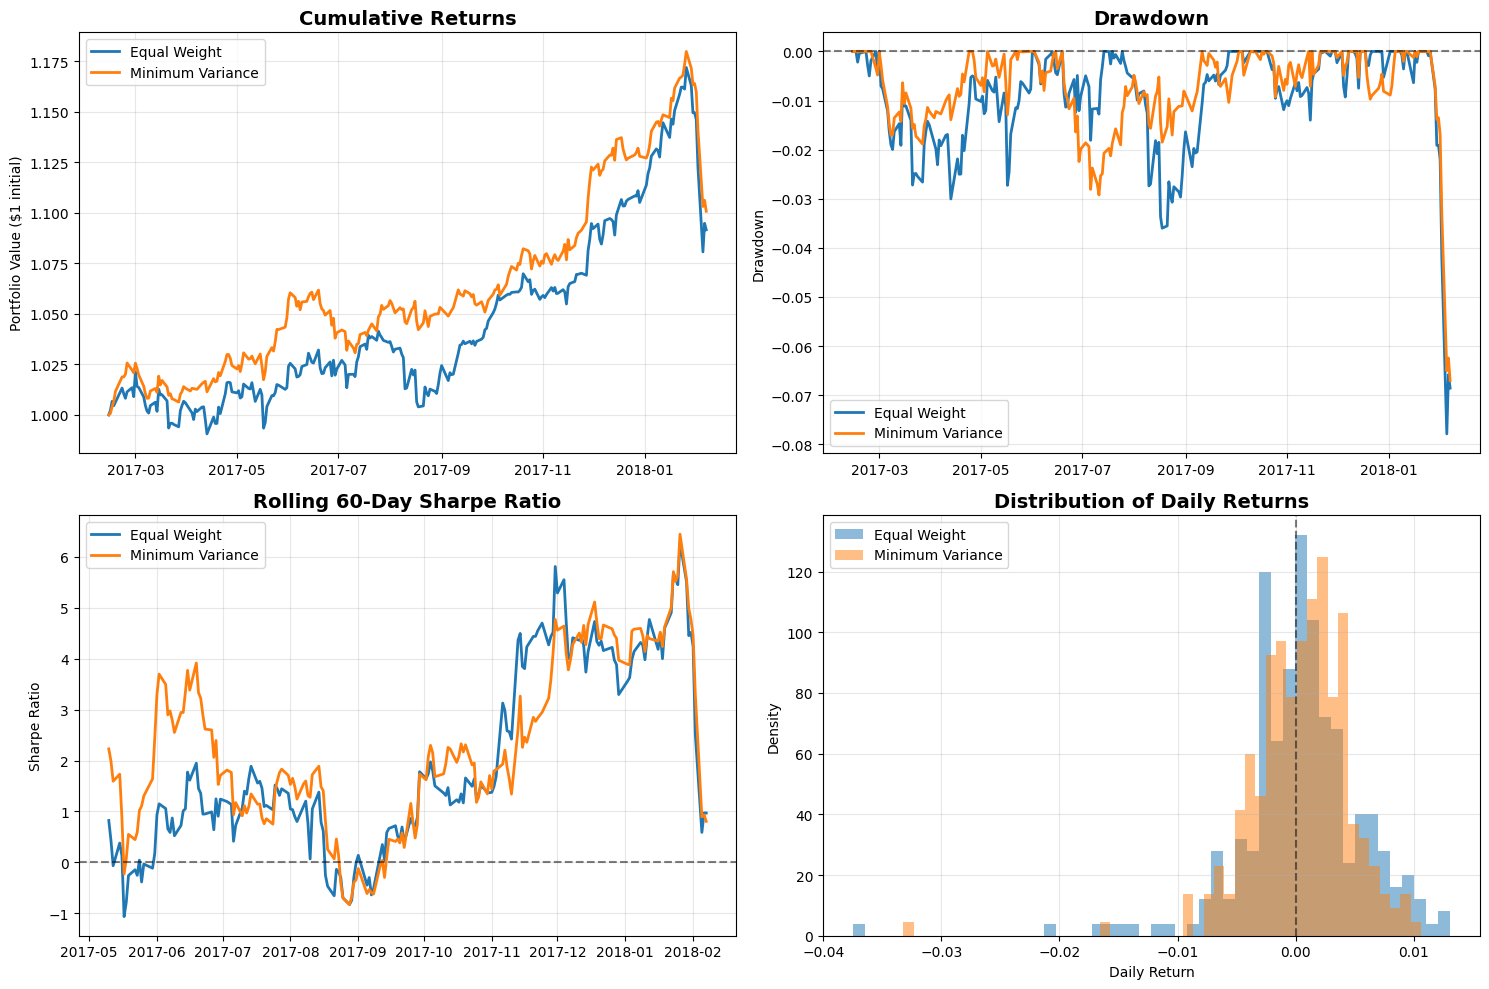

In [ ]:
evaluator = PerformanceEvaluator(test_risk_free_rate)

comparison_df = evaluator.compare_strategies(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string())

# ============================================================
# STEP 5: Visualize Results
# ============================================================
print("\n5. Generating Visualizations")
print("-" * 60)

fig = evaluator.plot_results(results, figsize=(15, 10))
plt.show()
    

In [69]:
from src import *

In [70]:
import src.ML_return_pred as mrp
predictor = mrp.MLReturnPredictor(model_type='ridge', alpha=1.0)
X_train, y_train = predictor.create_training_dataset(os.listdir('src/data'), train_returns)
predictor.train(X_train, y_train)

Creating training dataset from 1198 files...


FileNotFoundError: [Errno 2] No such file or directory: '2013-05-08.pkl'

package file: c:\Users\Josiah Lee\Documents\GitHub\dse4212_portfolio_optimisation\src\__init__.py
module: <module 'src.ML_return_pred' from 'c:\\Users\\Josiah Lee\\Documents\\GitHub\\dse4212_portfolio_optimisation\\src\\ML_return_pred.py'>
has MLReturnPredictor: True
module attrs: ['MLReturnPredictor', 'get_feature_files']
